# Bioduomenų surinkimas ir analizė

## Kolis Nr.7 2023-05-16

Sprendimus siųskite (vardas_pavarde_k7.ipynb; ipynb ir pdf/html formatais)
iki 2023-05-21 23:55 į avoicikas@gmail.com

Įveskite savo vardą ir pavardę

Vertinimas

- Komentarai 25 %
- Programos kodas 25 %
- Grafikai 25 %
- Rezultatas 25 %

---
>> **1. UŽDUOTIS**
>>
>> [Tekmės citometrija](http://www.esparama.lt/es_parama_pletra/failai/ESFproduktai/2013_Tekmes_citometrija.pdf)([Flow cytometry](https://en.wikipedia.org/wiki/Flow_cytometry)) tai analizinės citologijos tyrimo metodas,  ląstelių  tyrimui  naudojantis  laminariojo  skysčio  tekėjimo,  šviesos  optinės  sklaidos, imunoglobulinų biologijos bei fluorescencinių medžiagų chemijos principus. Kad tėkmės kameros tyrimo taške vyktų dalelių matavimas, citometruose įrengiamas  šviesos  šaltinis  (lazeriai,  UV  lempa),  kurio  spindulį  kerta  vorele  išrikiuotos  dalelės. Dalelės, priklausomai nuo jų dydžio, paviršiaus ir vidaus struktūrų sudėtingumo, šviesos spindulį išsklaido į skirtingas puses. Išskaidytą spindulio šviesą surenka ir jo stiprumą užfiksuoja priekinės šviesos sklaidos (PŠS – atspindi dalelės dydį) ir šoninės 90° kampo šviesos sklaidos (ŠŠS – fiksuoja dalelės struktūrų sudėtingumą) detektoriai, kurie paverčia šviesinį signalą elektroniniu. Išspinduliuotą fluorescencinę  šviesą  fiksuoja  šoninės  fluorescencinės  šviesos  sklaidos  (FL)  detektoriai.
>>
>> ![flowcyt](./Cytometer.png)
>>
>> Fiksuoti duomenys pateikti cyto.csv faile
>>
>> FSCH/SSCH - šviesos sklaidos matavimai. Šie parametrai atspindi ląstelės dydį (priekinės šviesos sklaida - FSCH) ir dalelės struktūrų sudėtingumą (šoninės šviesos sklaida - SSCH)
>>
>> FL1_H ... fluorescensijos parametrai.
>>
>> Gate - žymuo suteiktas tyrėjo kiekvienai ląstelei.
>> Du žymenys suteikti ląstelėm 1 ir 2. Triukšmas pažymėtas -1.
>>
>> Užduotis:
>> - Aprašyti duomenis ir automatizuokite žymenų suteikimą
>>
---

In [33]:
#Importuojam viska ko gali reiketi,
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from scipy import stats

In [85]:
#Duomenu isikelimas
data = pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K7\cyto.csv")
data=data[['FSC_H', 'SSC_H', 'FL1_H', 'FL2_H', 'FL3_H', 'FL1_A', 'FL1_W']]
data

,FSC_H,SSC_H,FL1_H,FL2_H,FL3_H,FL1_A,FL1_W
0,309,376,264,198,313,0,0
1,83,55,139,51,146,0,0
2,184,198,232,83,124,0,0
3,169,75,696,22,193,121,26
4,212,98,166,0,221,0,0
...,...,...,...,...,...,...,...
1540,340,460,249,23,363,0,0
1541,124,149,445,129,83,9,0
1542,678,327,274,196,259,0,0
1543,722,443,871,218,714,675,279


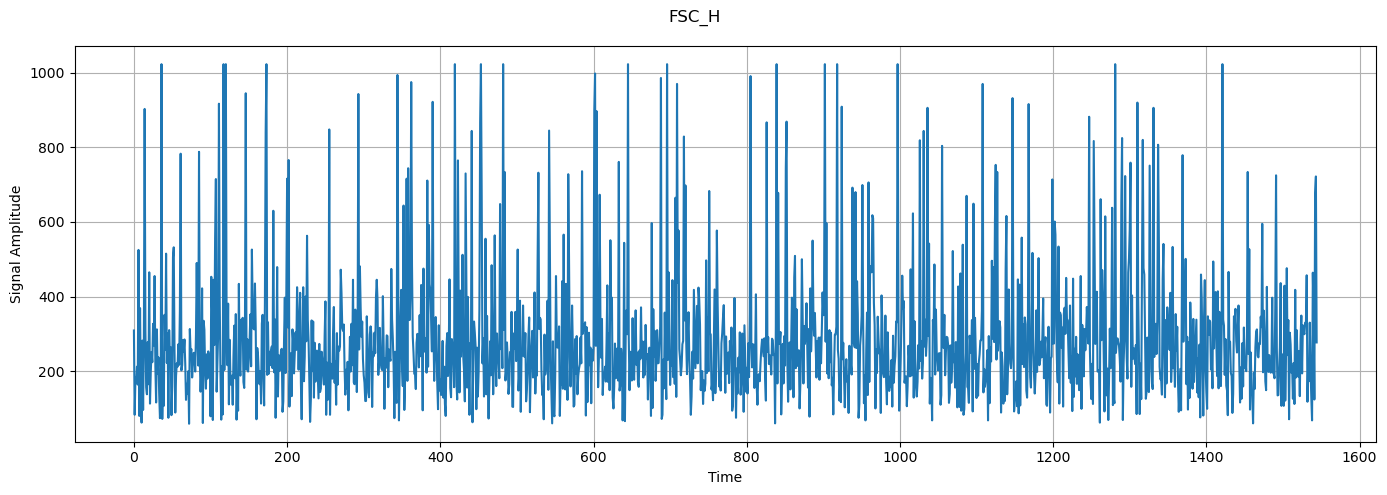

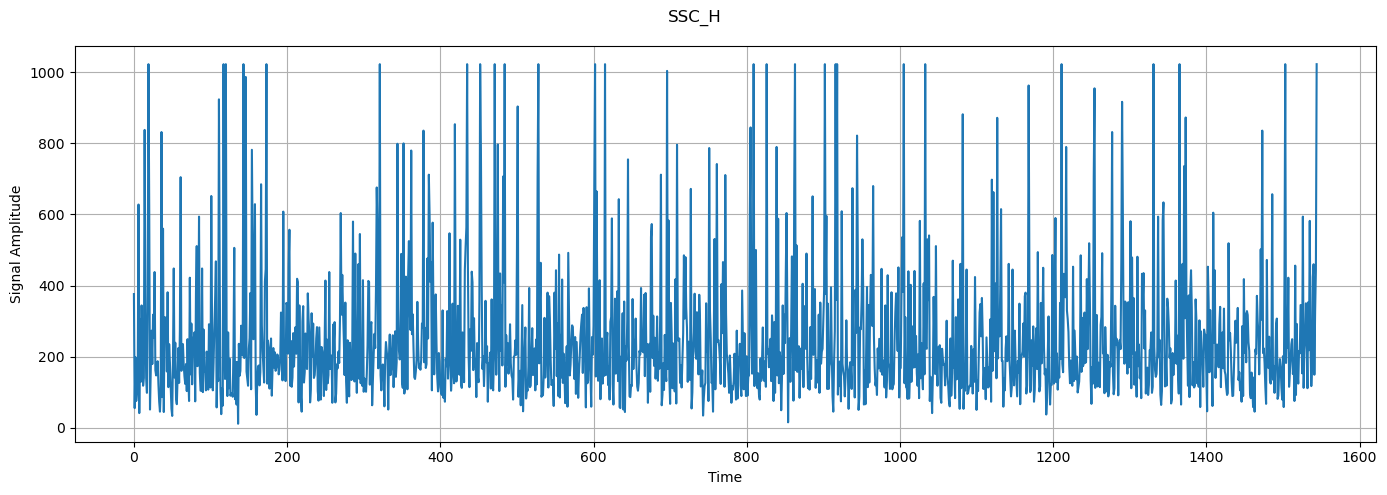

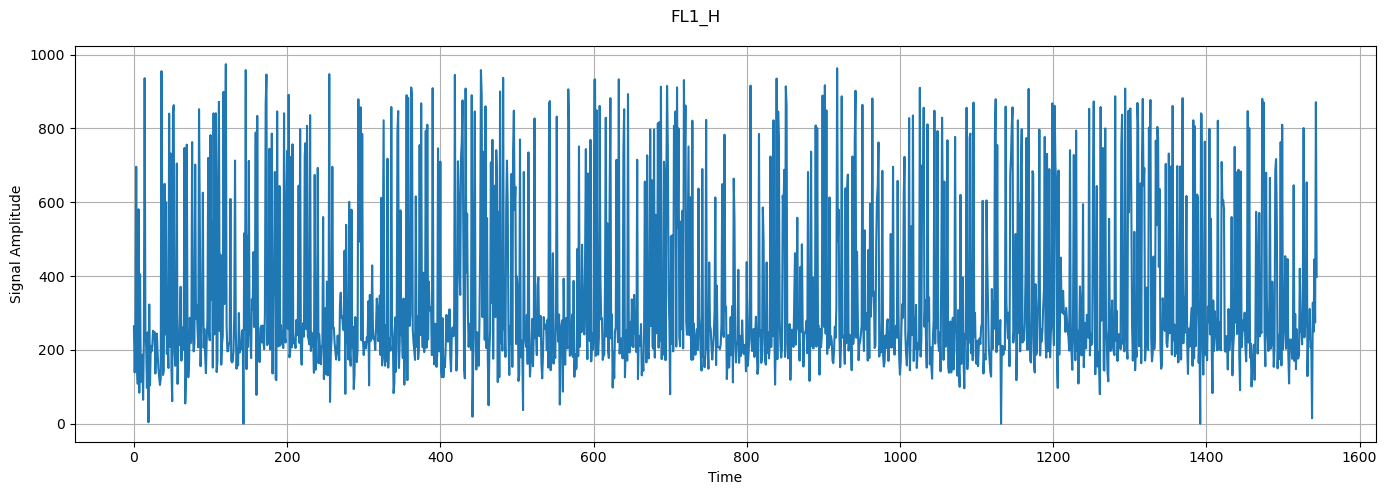

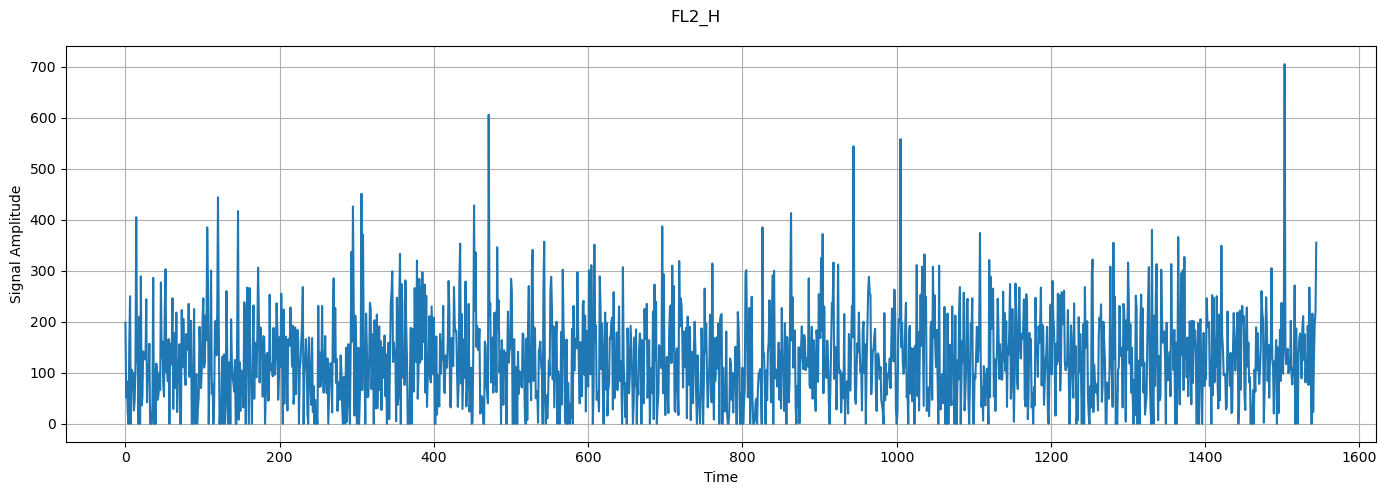

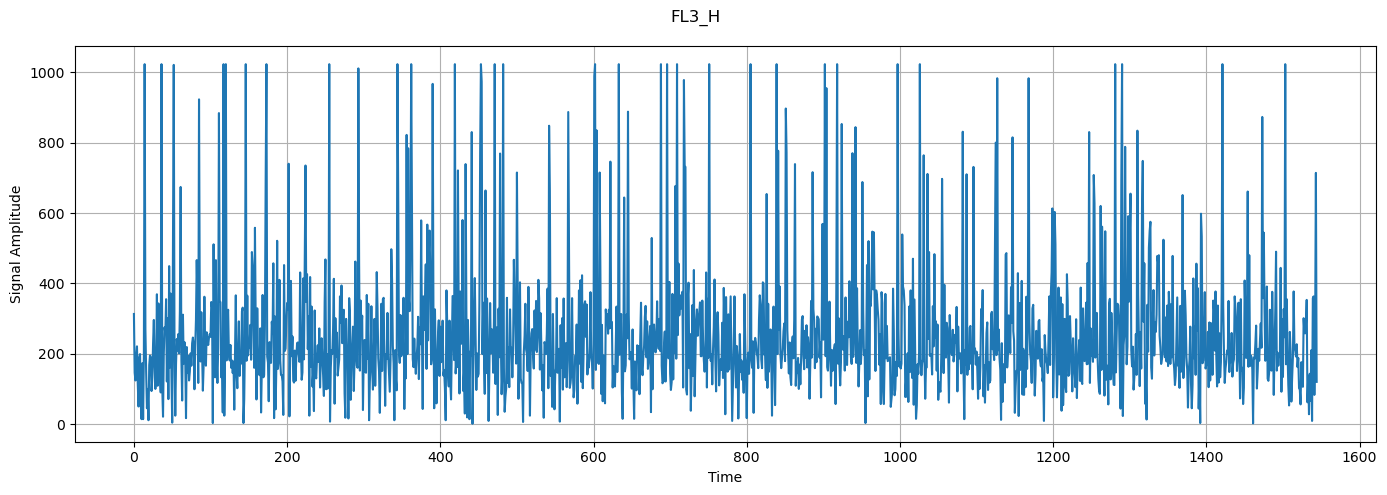

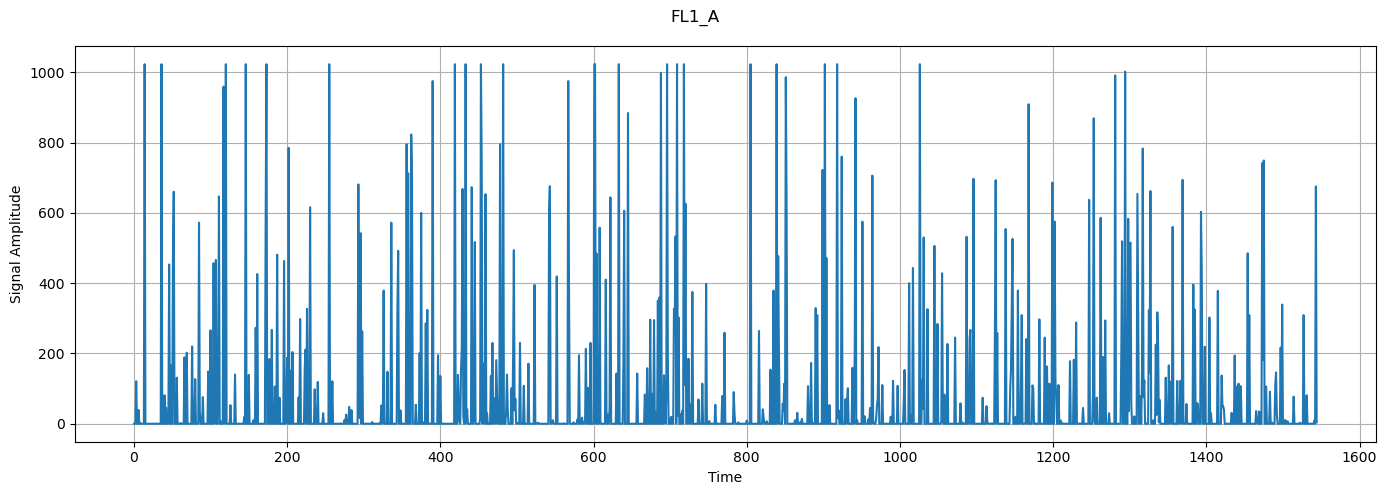

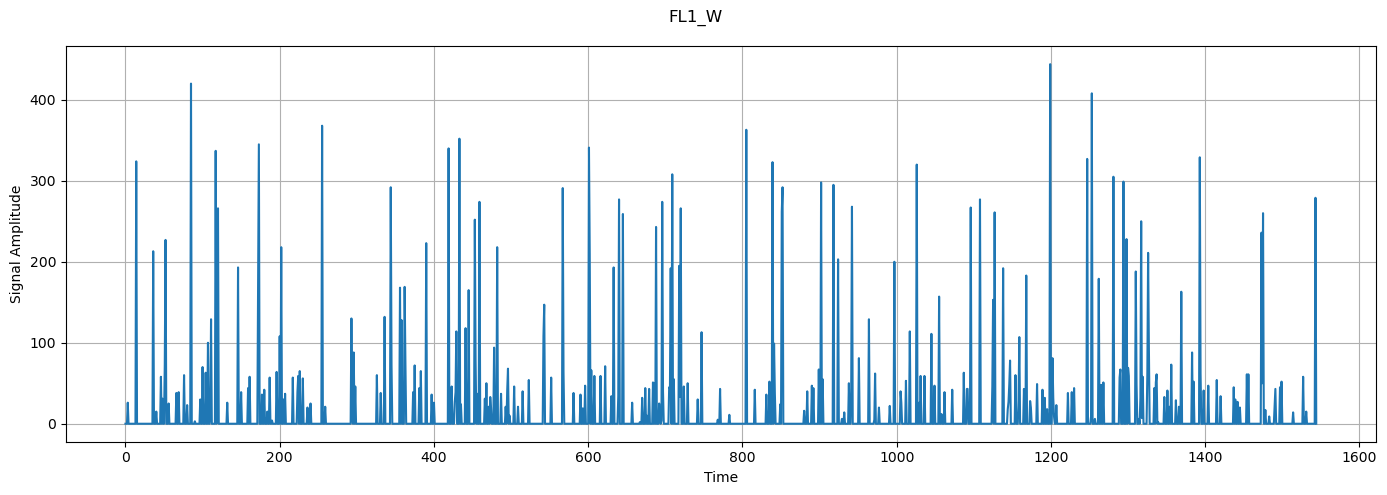

In [87]:
#Bam su vienu efektyviu for loop'u vizualizuojame visus duomenis ir stats.describe funkcija gauname duomenu parametrus atskirame Dataframe !
df = []
comb_df1=[]
for column_name in data.columns:
    fig, axes = plt.subplots(figsize=(14, 5))
    fig.suptitle(column_name)
    data[column_name].plot(kind='line')
    axes.set_xlabel("Time")
    axes.set_ylabel("Signal Amplitude") # Cia tycia palikau ir laika ir signalo tikslius vienetus nepazymetus nes ziurint internete radau skirtingu variantu kokiais vienetais matuojama. Neaiskumas geriau negu melas :D!
    df.append(pd.DataFrame(data[column_name].describe()))
    comb_df1 = pd.concat(df,axis=1)
    plt.grid()
    plt.tight_layout()
    plt.show()

In [42]:
comb_df1 # Kaip atrodo duomenu parametrai !

,FSC_H,SSC_H,FL1_H,FL2_H,FL3_H,FL1_A,FL1_W
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.00000,1545.000000
mean,287.082201,251.826537,349.163754,126.399353,258.344984,73.45890,17.598706
std,178.193127,186.647075,234.347550,90.839352,192.264975,195.15186,56.391323
min,59.000000,11.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,178.000000,130.000000,197.000000,55.000000,150.000000,0.00000,0.000000
50%,249.000000,199.000000,244.000000,116.000000,203.000000,0.00000,0.000000
75%,331.000000,307.000000,445.000000,185.000000,315.000000,8.00000,0.000000
max,1023.000000,1023.000000,974.000000,705.000000,1023.000000,1023.00000,444.000000


In [88]:
data = pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K7\cyto.csv") # Cia is naujo uploadinu duomenis del paprastumo
data

,FSC_H,SSC_H,FL1_H,FL2_H,FL3_H,FL1_A,FL1_W,Time,Gate
0,309,376,264,198,313,0,0,2,1
1,83,55,139,51,146,0,0,2,1
2,184,198,232,83,124,0,0,2,1
3,169,75,696,22,193,121,26,2,2
4,212,98,166,0,221,0,0,2,1
...,...,...,...,...,...,...,...,...,...
1540,340,460,249,23,363,0,0,598,1
1541,124,149,445,129,83,9,0,598,1
1542,678,327,274,196,259,0,0,598,-1
1543,722,443,871,218,714,675,279,598,2


In [92]:
#Cia plius/minus panasus sablonas visoms trims uzduotims. Zaidziau su hyperparametrais visai daug ir palikta tinkamiausia struktura( nu bent geriausius rezultatus duota)
#Kai kur modeli treneravau keleta kartu - pamatysit uzkomentuota koda su kurio taip dariau.

data = data.sample(frac=1)
data = data[data["Gate"] != -1] # Ismetam noisa, Palikome ji vizualizacijoje kad pamatyty kokias abnormalijas - galbut ten yra naudingu tendenciju, arba tai visai ne noisas.
ydata=data[1000:] #Daliname duomenis plius minus visu i 0.85 train ir 0.15 test. Kadangi neturime daug duomenu sitame uzdaviny nedarome validation seto.
data=data[:1000] 


In [93]:
#Suverciam duomenis i numpy. Kad tinklas galetu efektyviai priimti.
input_attributes = ['FSC_H', 'SSC_H', 'FL1_H', 'FL2_H', 'FL3_H', 'FL1_A', 'FL1_W']

x_train = data[input_attributes].to_numpy()
y_train= data['Gate'].to_numpy()
x_test= ydata[input_attributes].to_numpy()
y_test= ydata['Gate'].to_numpy()
print(x_train.shape, y_train.shape)

(1000, 7) (1000,)


In [96]:
inshape=(7,) 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=inshape),
    tf.keras.layers.Dense(128, activation="tanh"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])


#Ikeliau katik patreneruota modeli kad pamazint lr - gauti geresni tiksluma, nesvaistant laiko
#model= tf.keras.models.load_model(r"C:\Users\taura\Documents\biod2022\exam\K7\classificator_model.h5")
#Paliksiu sita po komentaru 

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), # Sitam uzdaviniui tinklo sudetingumas beveik nebuvo svarbus - buvo svarbu tik parinkti ganetinai zema learning rate'a.
              metrics=['accuracy'])

In [97]:
# Treneruojame !
model.fit(x_train, y_train,
          batch_size=5,
          epochs=50,
          verbose=1)
    
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

model.save('classificator_model_GATETATRON.h5')

Epoch 1/50
200/200 [==============================] - 1s 893us/step - loss: 0.2494 - accuracy: 0.9110
Epoch 2/50
200/200 [==============================] - 0s 916us/step - loss: 0.1522 - accuracy: 0.9500
Epoch 3/50
200/200 [==============================] - 0s 880us/step - loss: 0.1381 - accuracy: 0.9540
Epoch 4/50
200/200 [==============================] - 0s 871us/step - loss: 0.1220 - accuracy: 0.9610
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9540
Epoch 6/50
200/200 [==============================] - 0s 987us/step - loss: 0.1431 - accuracy: 0.9590
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9630
Epoch 8/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9610
Epoch 9/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1078 - accuracy: 0.9600
Epoch 10/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0903 - accura

---
>> **2. UŽDUOTIS**
>>
>> 8 kanalų EEG užfiksuoti akių judesiai: viršun (up), žemyn (down), kairėn (left), dešinėn (right) trunkantys 2 sekundes nuo judesio instrukcijos pateikimo (0 ms - 2000 ms)
>>
>> Duomenys pateikti data.csv faile. Duomenims pritaikytas 1-40 Hz filtras.
>>
>> Stulpeliai:
>> - time: laikas ($ms$)
>> - condition: sąlyga (up, down, left, right)
>> - epoch: 2 sekundžių trukmės atkarpa, kiekvienai sąlygai po 210 pakartojimų
>> - F3-O1: EEG duomenys iš skirtingų sensorių ($\mu V$)
>>
>> Užduotis:
>> - Aprašykite duomenis ir sukurkite klasifikatorių klasifikuojantį šias sąlygas

---

In [26]:
data = pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K7\data.csv")
data=data[['F3', 'F4', 'C3', 'C4', 'P4', 'P3', 'O1','O2']]

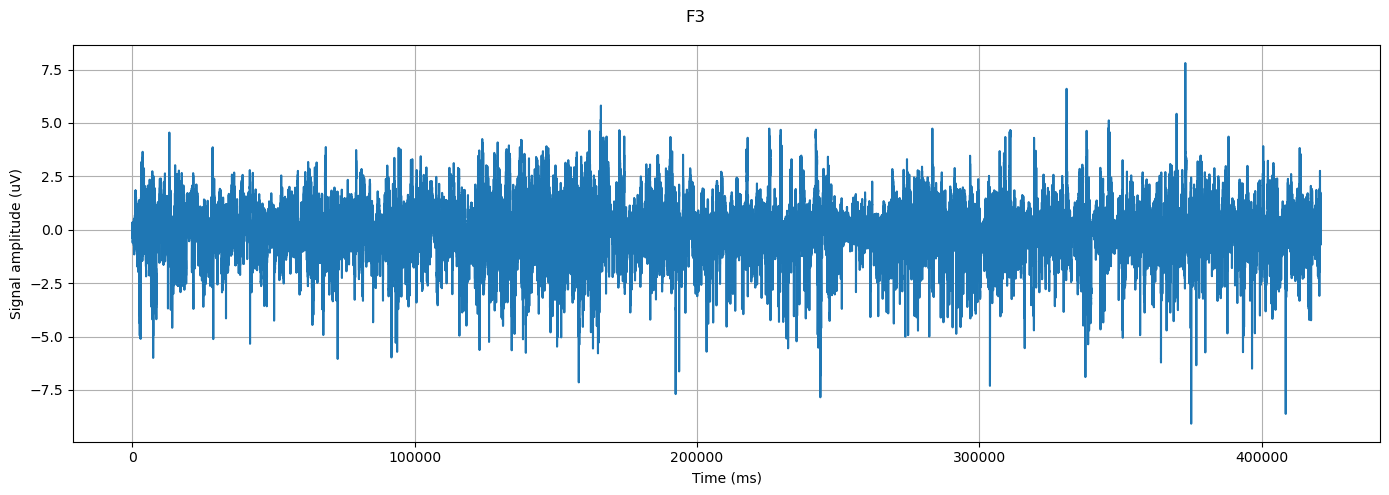

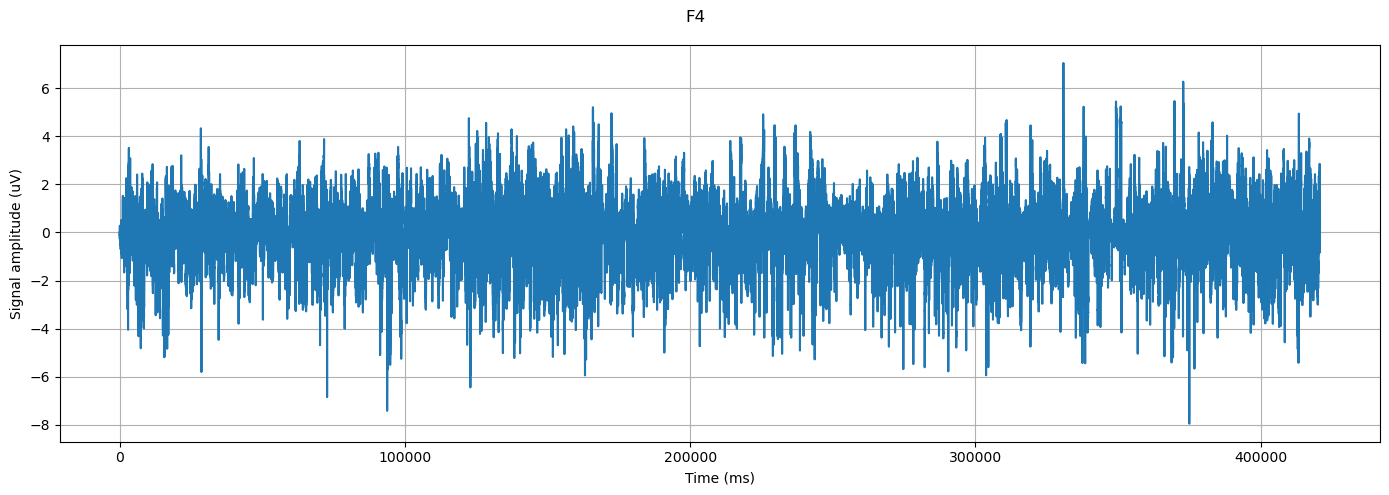

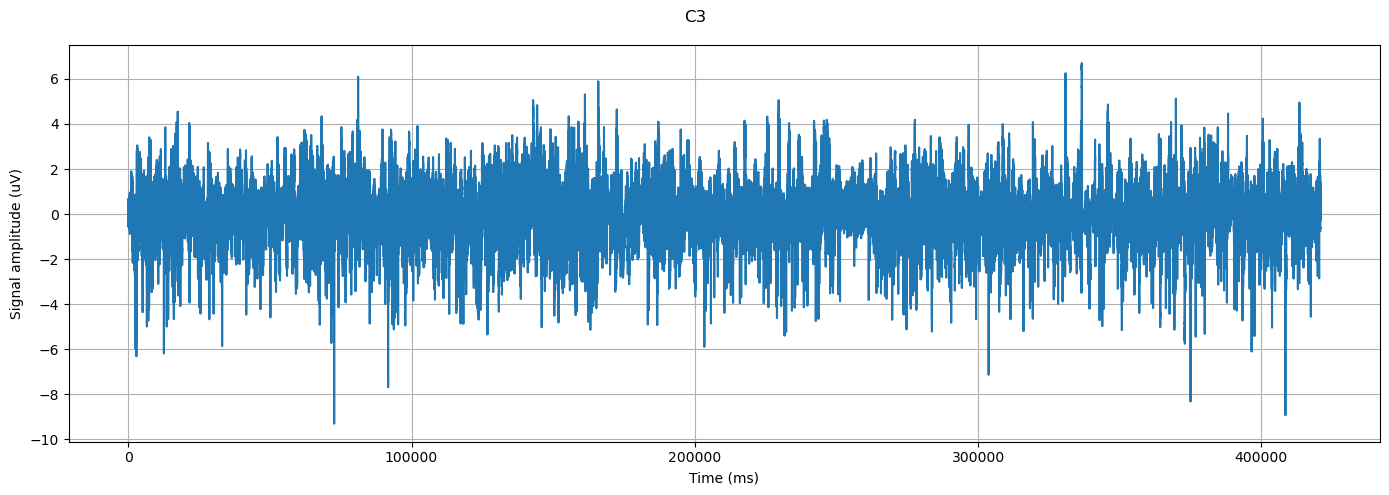

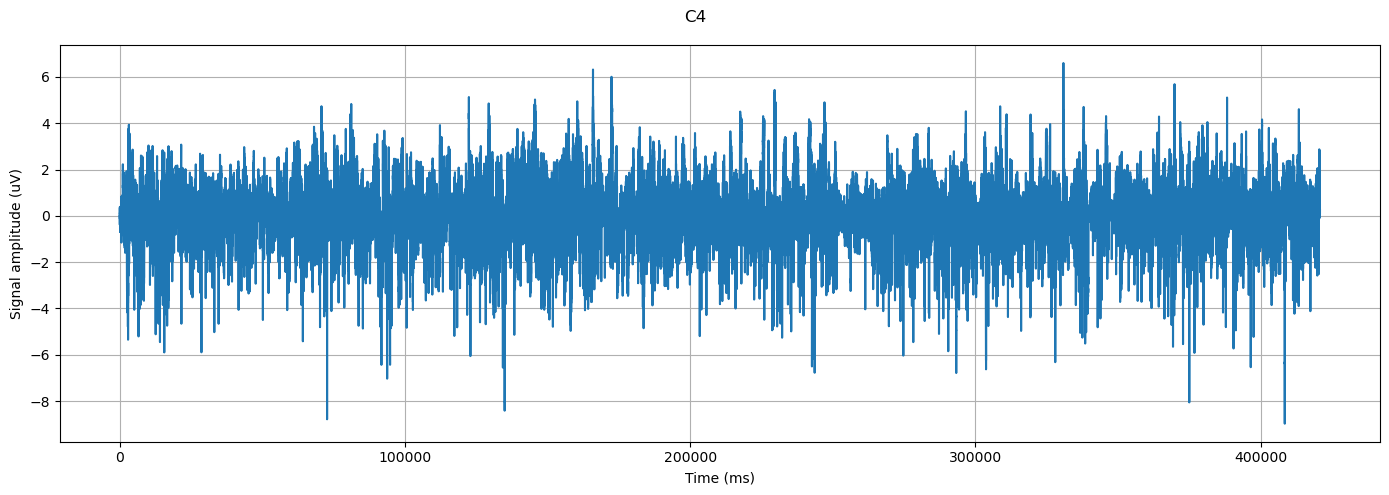

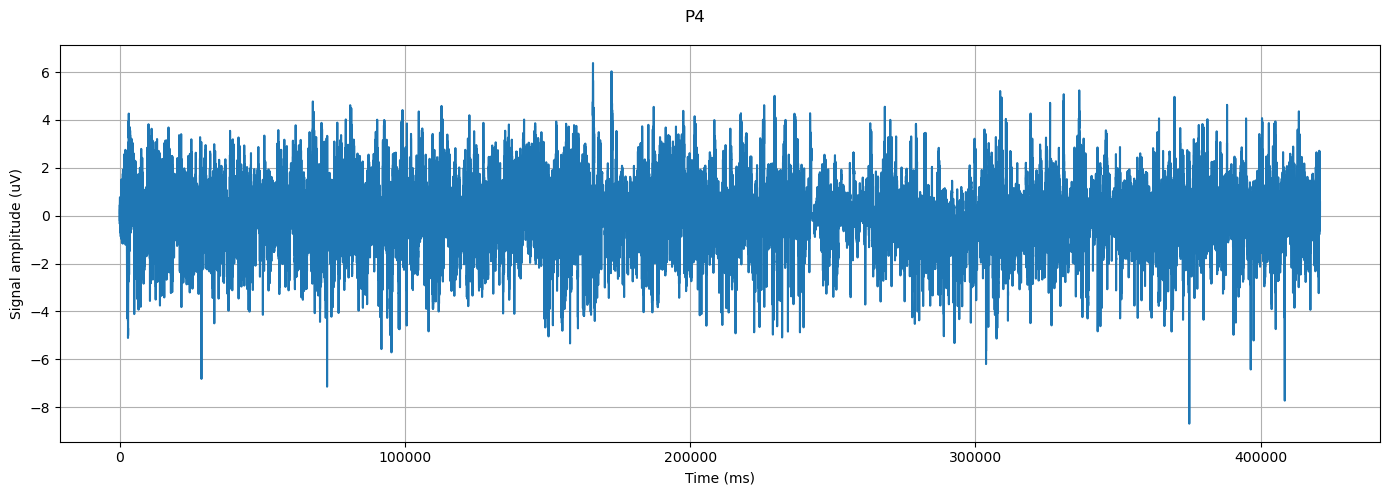

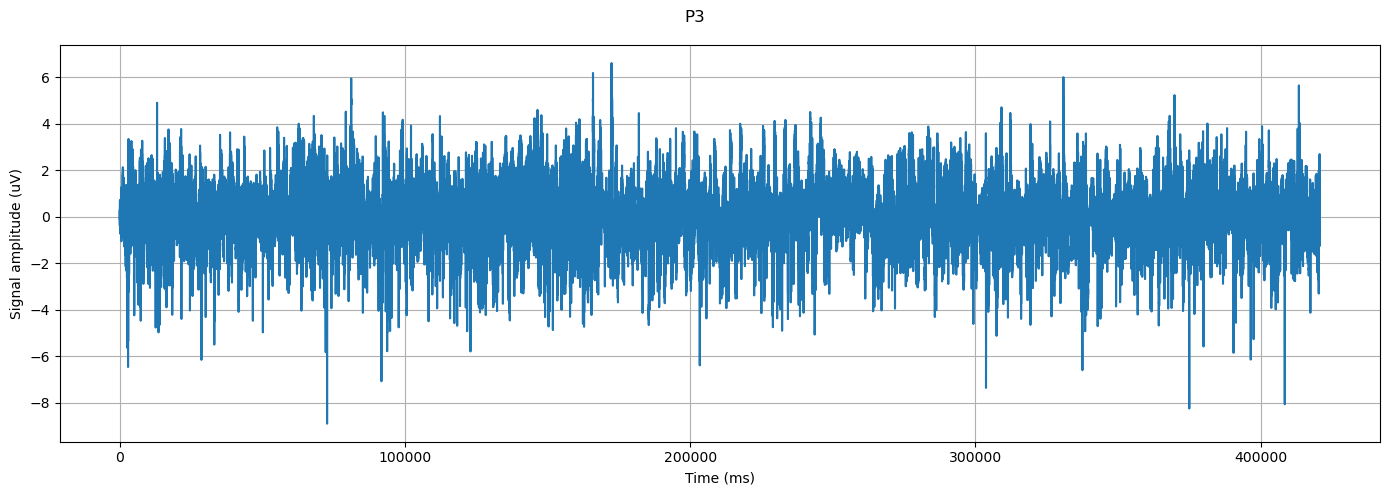

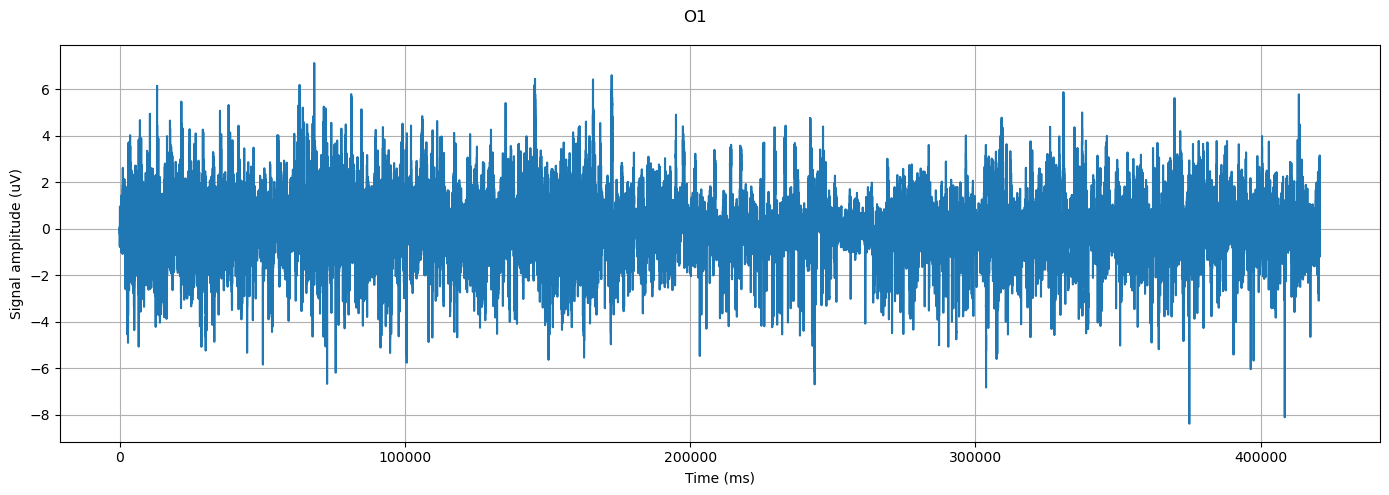

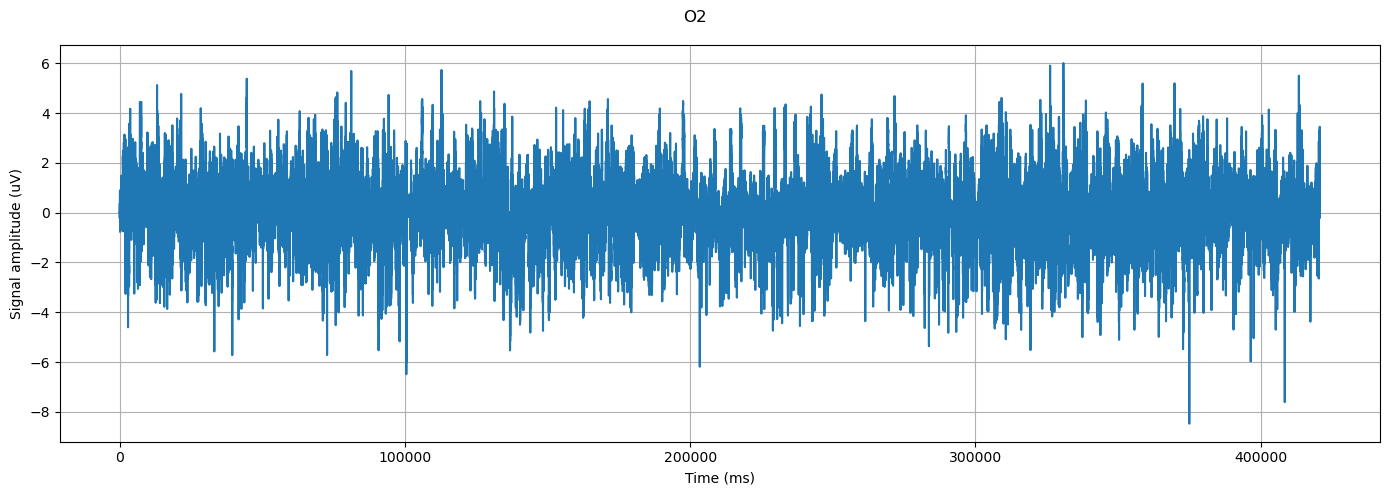

In [27]:
#Vizualizacijos kodas !
dfs = []
comb_df=[]
for column_name in data.columns:
    fig, axes = plt.subplots(figsize=(14, 5))
    fig.suptitle(column_name)
    data[column_name].plot(kind='line')
    axes.set_xlabel("Time (ms)")
    axes.set_ylabel("Signal amplitude (uV)")
    plt.tight_layout()
    plt.grid()
    plt.show()
    dfs.append(pd.DataFrame(data[column_name].describe()))
    comb_df = pd.concat(dfs,axis=1)

In [98]:
comb_df # DUOMENYS VIZUALIZUOTI IR APRASYTI

,F3,F4,C3,C4,P4,P3,O1,O2
count,420840.000000,420840.000000,420840.000000,420840.000000,420840.000000,420840.000000,420840.000000,420840.000000
mean,-0.102443,-0.070596,-0.026471,-0.052342,-0.006648,0.021076,0.031424,-0.012641
std,1.120000,1.195829,1.140126,1.153030,1.179813,1.168052,1.155759,1.183406
min,-9.077139,-7.955945,-9.313825,-8.974295,-8.690826,-8.893315,-8.383163,-8.471735
25%,-0.687507,-0.745826,-0.633778,-0.675567,-0.708042,-0.645274,-0.597544,-0.679125
50%,-0.046007,-0.024785,0.001979,-0.011822,0.002169,0.025785,0.018112,0.000000
75%,0.529684,0.624371,0.611577,0.588907,0.676781,0.686306,0.642411,0.650828
max,7.804427,7.050285,6.708467,6.599659,6.378563,6.602802,7.130652,6.008390


In [29]:
data=pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K7\data.csv") #Cia del paprastumo is naujo isikeliame duomenis
data=data.replace('down', 0)#Pakeiciame kiekviena condition i skaiciu kad butu lengviau priskirt ir atpazinti tinklui
data=data.replace('left', 1)
data=data.replace('right', 2)
data=data.replace('up', 3)

In [30]:
data = data.sample(frac=1)
ydata=data[336672:]
data=data[:336672]

In [31]:
#Is tiesu ta pati struktura kaip pries tai
input_attributes = [ 'F3', 'F4', 'C3', 'C4', 'P4', 'P3', 'O1', 'O2']

x_train = data[input_attributes].to_numpy()
y_train= data["condition"].to_numpy()
x_test= ydata[[ 'F3', 'F4', 'C3', 'C4', 'P4', 'P3', 'O1', 'O2']].to_numpy()
y_test= ydata["condition"].to_numpy()
print(x_train.shape, y_train.shape)

(336672, 8) (336672,)


In [32]:
inshape=(8,) 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=inshape),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="tanh"),
    tf.keras.layers.Dense(4, activation="softmax")
])


#Ikeliau katik patreneruota modeli kad pamazint lr - gauti geresni tiksluma, nesvaistant laiko
#model= tf.keras.models.load_model(r"C:\Users\taura\Documents\biod2022\exam\K7\classificator_model.h5")
#Paliksiu sita po komentaru veliau

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

In [13]:

model.fit(x_train, y_train,
          batch_size=2000,
          epochs=80,
          verbose=1)
    
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

model.save('classificator_model.h5')

Epoch 1/80
169/169 [==============================] - 2s 7ms/step - loss: 1.1913 - accuracy: 0.4690
Epoch 2/80
169/169 [==============================] - 1s 7ms/step - loss: 1.1126 - accuracy: 0.5155
Epoch 3/80
169/169 [==============================] - 1s 7ms/step - loss: 1.0727 - accuracy: 0.5375
Epoch 4/80
169/169 [==============================] - 1s 7ms/step - loss: 1.0437 - accuracy: 0.5535
Epoch 5/80
169/169 [==============================] - 1s 7ms/step - loss: 1.0216 - accuracy: 0.5646
Epoch 6/80
169/169 [==============================] - 1s 8ms/step - loss: 1.0035 - accuracy: 0.5748
Epoch 7/80
169/169 [==============================] - 1s 7ms/step - loss: 0.9874 - accuracy: 0.5821
Epoch 8/80
169/169 [==============================] - 1s 7ms/step - loss: 0.9749 - accuracy: 0.5889
Epoch 9/80
169/169 [==============================] - 1s 7ms/step - loss: 0.9630 - accuracy: 0.5953
Epoch 10/80
169/169 [==============================] - 1s 7ms/step - loss: 0.9530 - accuracy: 0.5997

In [ ]:
#Zymiai logiskiau tesiog is paskaitu medziagos classifactoriu naudoti is sci-kit learn, nes jis gautu daugiau proc bet taip neidomu. Cia is tiesu visom trim uzduotim

---
>> **3. UŽDUOTIS**
>>
>> Paskaitos metu atlikome SSVEP eksperimentą. Buvo pateikti 4 dažnių stimulai (12, 8.57, 6.67, 5.45 Hz) į kuriuos atsitiktine tvarka prašoma koncentruotis.
>>
>> Duomenys pateikti ../K5/SSVEP ir ../K2/SSVEP (aprašas K2) direktorijoje. 
>>
>> (K5) EEG signalai - 5.2 sekundžių atkarpos stimuliacijos metu.
>>
>> Diskretizacijos dažnis 250 Hz. Stulpeliai:
>> - time: laikas sekundėmis aplink stimulą
>> - condition: sąlyga atspindinti stimuliavimo dažnį
>> - epoch: atkarpos numeris
>> - F3, F4, P3, P4, C3, C4, O1, O2: EEG kanalai
>> - Accel..: Akselerometro kanalai
>>
>> ![channels](../K2/chan8.png)
>>
>> Užduotis:
>> - Sukurkite klasifikatorių klasifikuojantį šias sąlygas
>>
>> Literatūra:
>> - https://en.wikipedia.org/wiki/Steady_state_visually_evoked_potential
>> - https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0191673
>> - [SSVEP apžvalga](../K2/SSVEP.pdf)
---

In [ ]:
# Duomenu vizualizacija ir preproccesing'a  tesiog pavogiame is praeito kolio - bet tai moralu ir teisinga nes sita koda rasiau as pats ir manau labai protinga ji ir naudoti.

<Axes: xlabel='time'>

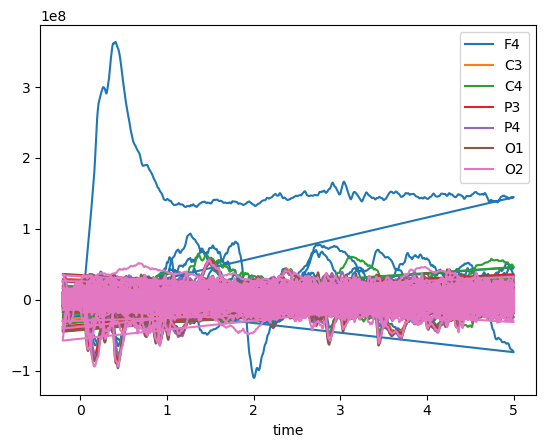

In [99]:
sr= 250
dataa=pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K5\SSVEP\20230228_1211-sub-02_ssvep_Collect4Target_eeg_controller_4target-raw.csv",index_col=1)
#Sitas eilutes palikau komentaruose del paprastesnio duomenu apzvelgimo bet visas kodas pilnai veikia suliejus visus duomenis
datab=pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K5\SSVEP\20230228_1238-sub-03_ssvep_Collect4Target_eeg_controller_4target-raw.csv",index_col=1)
datac=pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K5\SSVEP\20230228_1300-sub-01_ssvep_Collect4Target_eeg_controller_4target-raw.csv",index_col=1)
dataa=pd.concat([dataa, datab,datac], axis=0)
dataa.groupby(['condition', 'epoch'])[(['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2'])]
dataa["average"]=dataa[['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']].mean(axis=1)
# GAVOME VISU DAZNIU VISUS SIGNALUS -  F3 duomenys blogi.
HZ12=dataa[dataa["condition"]== 12.0].iloc[:,4:11]
HZ857=dataa[dataa["condition"]== 8.57].iloc[:,4:11]
HZ667=dataa[dataa["condition"]== 6.67].iloc[:,4:11]
HZ545=dataa[dataa["condition"]== 5.45].iloc[:,4:11]
#Gerai gauta manau vidurkiai kanalu pagal epochas
################################F3 duomenys blogi.
dataa.iloc[:,4:11].plot()

<Figure size 640x480 with 0 Axes>

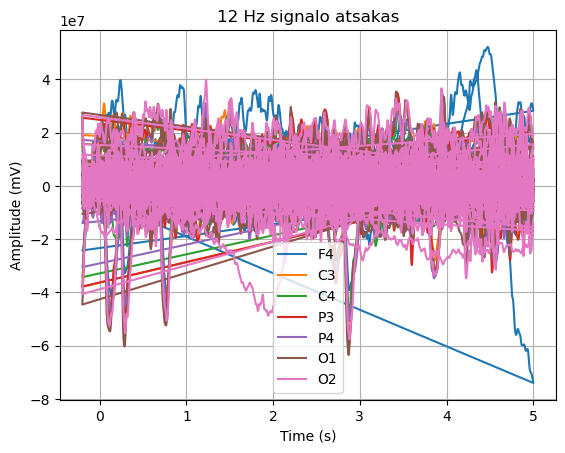

<Figure size 640x480 with 0 Axes>

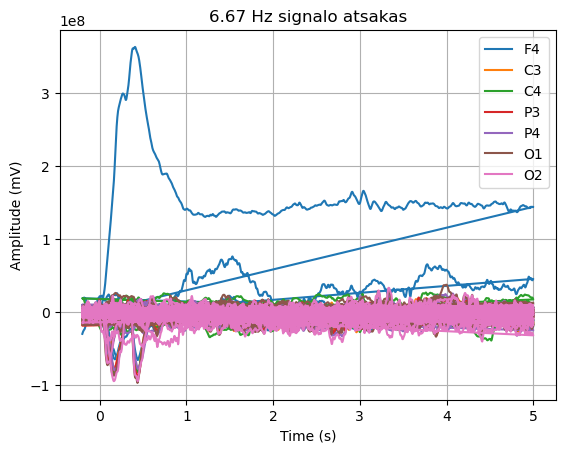

<Figure size 640x480 with 0 Axes>

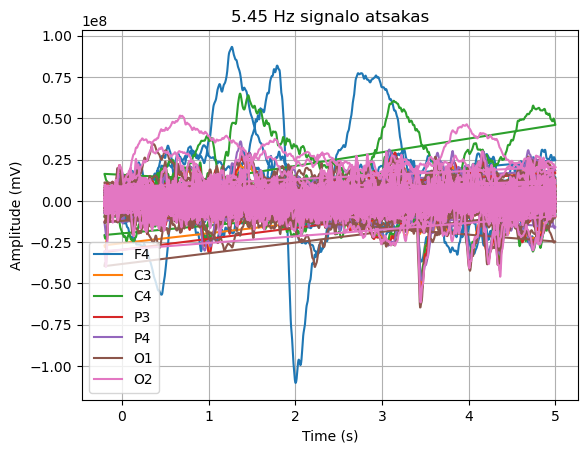

<Figure size 640x480 with 0 Axes>

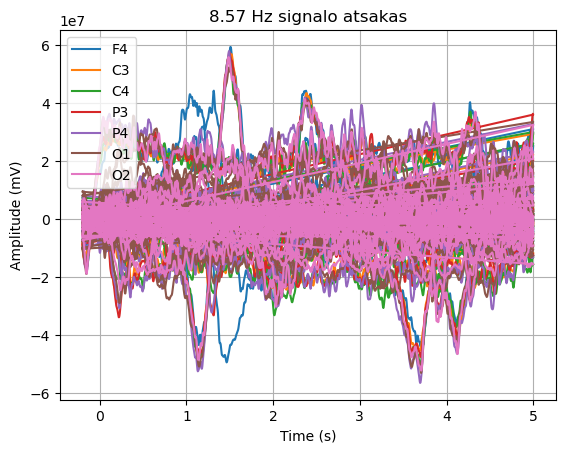

In [100]:
#Vizualizuokite atsakus į skirtingus stimulus
#
plt.figure()
HZ12.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title("12 Hz signalo atsakas");
plt.grid()
plt.show()
#
plt.figure()
HZ667.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title("6.67 Hz signalo atsakas");
plt.grid()
plt.show()
#
plt.figure()
HZ545.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title("5.45 Hz signalo atsakas");
plt.grid()
plt.show()
#
plt.figure()
HZ857.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid()
plt.title("8.57 Hz signalo atsakas");
plt.show()
#Baigta Vizualizacija signalo!

Pagal musu daznine analize matome kad galima nustatyti i kurio daznio stimula reaguoja bandomasis pagal atsako daznine charakteristika
12 Hz - apie 22 Hz atsakas ,8.57 Hz -apie 55-60 Hz atsakas ,6.67 Hz-apie 5-15 Hz atsakas,5.45 Hz- apie 35 Hz atsakas.


<Figure size 640x480 with 0 Axes>

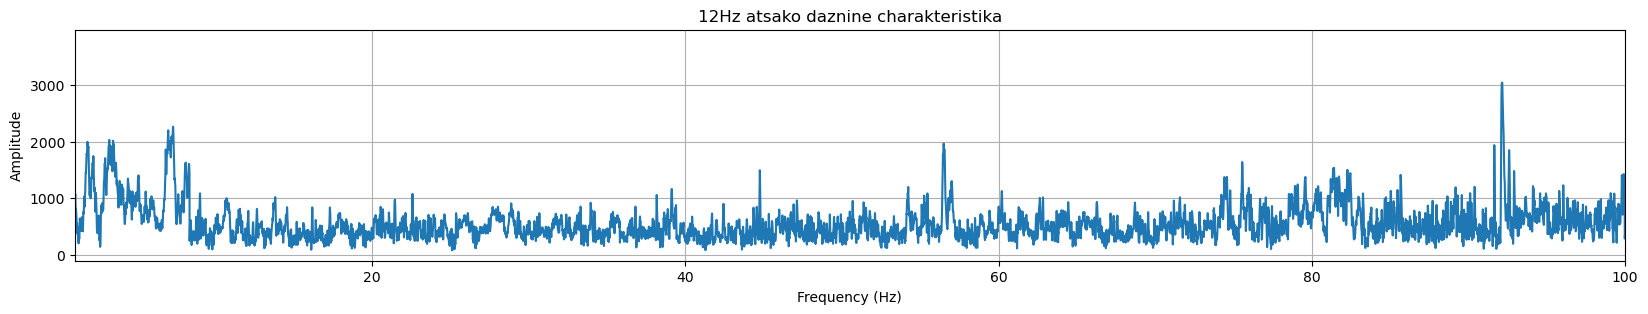

<Figure size 640x480 with 0 Axes>

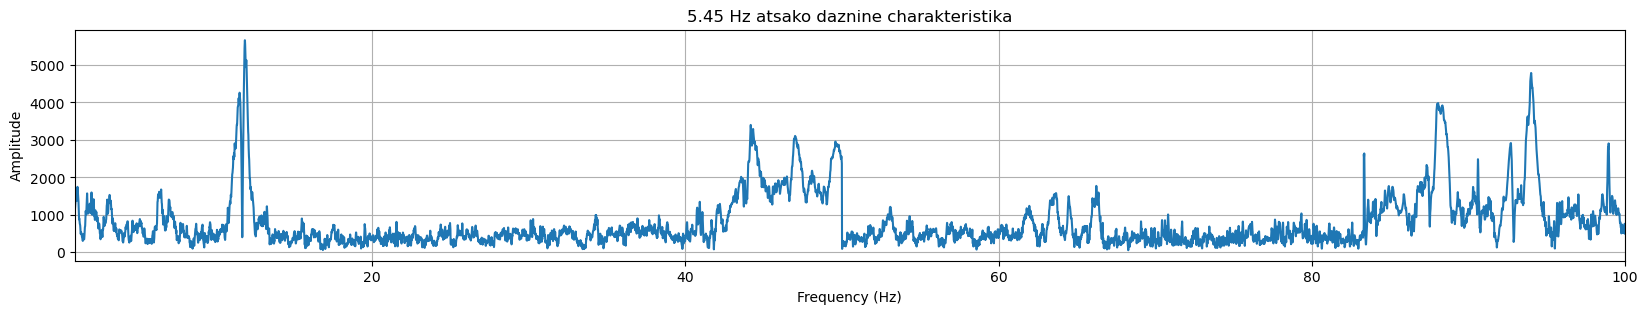

<Figure size 640x480 with 0 Axes>

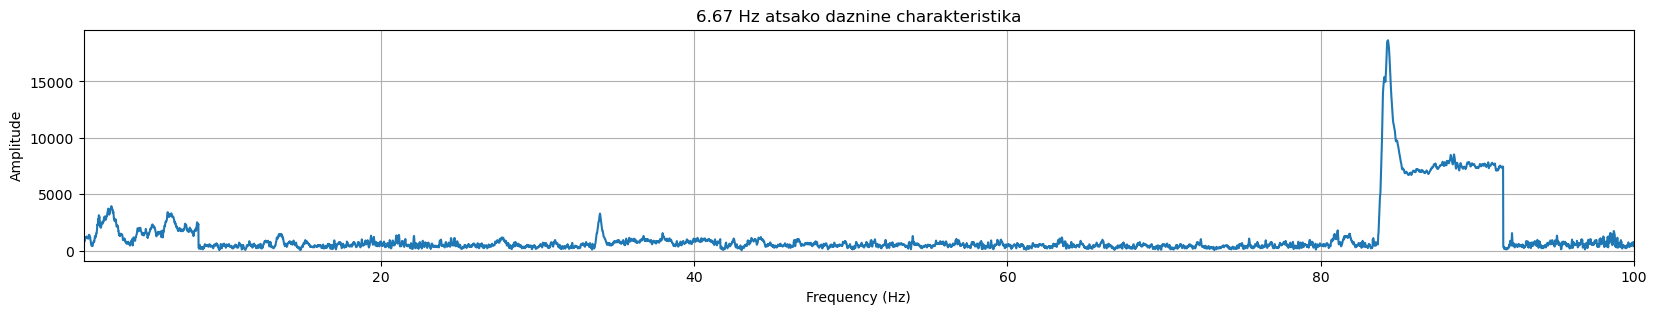

<Figure size 640x480 with 0 Axes>

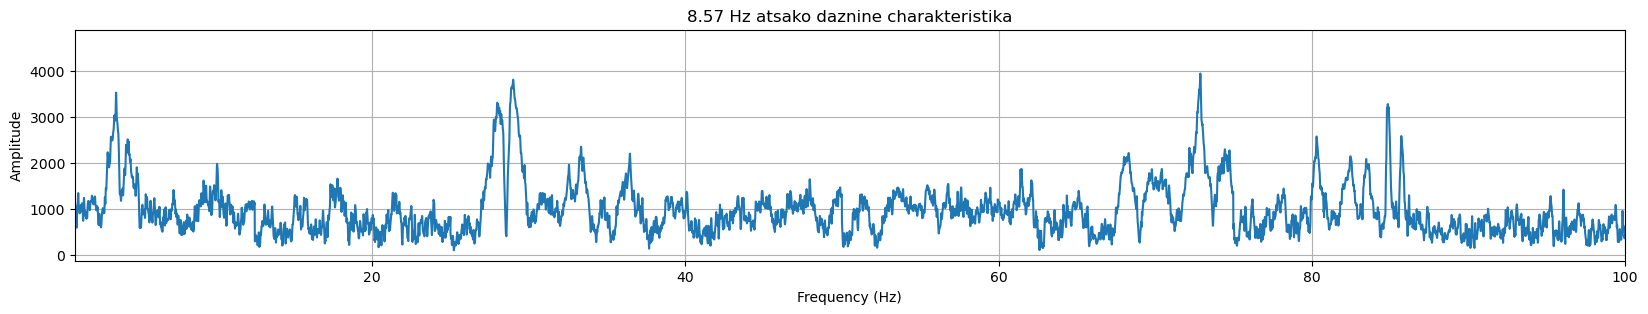

In [101]:
#DAROM DAZNIU ANALIZE  FFT
plt.figure()
HZ12ff=pd.DataFrame(np.fft.fft(HZ12))
x_fft_avg = np.mean(abs(np.array(HZ12ff)), axis=1)
n = HZ12ff[0].size
timestep = 1/sr
freq = np.fft.fftfreq(n, d=timestep)
fig = plt.figure(figsize=(20, 3))
plt.plot(freq[0:n//2], 2.0/len(x_fft_avg) * abs(x_fft_avg[0:len(x_fft_avg)//2]))
plt.xlim(1,100)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude");
plt.title("12Hz atsako daznine charakteristika")
####
plt.figure()
HZ545ff=pd.DataFrame(np.fft.fft(HZ545))
x_fft_avg = np.mean(abs(np.array(HZ545ff)), axis=1)
n = HZ545ff[0].size
timestep = 1/sr
freq = np.fft.fftfreq(n, d=timestep)
fig = plt.figure(figsize=(20, 3))
plt.plot(freq[0:n//2], 2.0/len(x_fft_avg) * abs(x_fft_avg[0:len(x_fft_avg)//2]))
plt.xlim(1,100)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude");
plt.title("5.45 Hz atsako daznine charakteristika")
#
plt.figure()
HZ667ff=pd.DataFrame(np.fft.fft(HZ667))
x_fft_avg = np.mean(abs(np.array(HZ667ff)), axis=1)
n = HZ667ff[0].size
timestep = 1/sr
freq = np.fft.fftfreq(n, d=timestep)
fig = plt.figure(figsize=(20, 3))
plt.plot(freq[0:n//2], 2.0/len(x_fft_avg) * abs(x_fft_avg[0:len(x_fft_avg)//2]))
plt.xlim(1,100)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude");
plt.title("6.67 Hz atsako daznine charakteristika")
#
plt.figure()
HZ857ff=pd.DataFrame(np.fft.fft(HZ857))
x_fft_avg = np.mean(abs(np.array(HZ857ff)), axis=1)
n = HZ857ff[0].size
timestep = 1/sr
freq = np.fft.fftfreq(n, d=timestep)
fig = plt.figure(figsize=(20, 3))
plt.plot(freq[0:n//2], 2.0/len(x_fft_avg) * abs(x_fft_avg[0:len(x_fft_avg)//2]))
plt.xlim(1,100)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude");
plt.title("8.57 Hz atsako daznine charakteristika")
print("Pagal musu daznine analize matome kad galima nustatyti i kurio daznio stimula reaguoja bandomasis pagal atsako daznine charakteristika")
print("12 Hz - apie 22 Hz atsakas ,8.57 Hz -apie 55-60 Hz atsakas ,6.67 Hz-apie 5-15 Hz atsakas,5.45 Hz- apie 35 Hz atsakas.")

In [102]:
# DUOMENYS VISUALiZUOTI  ir Dabar tesiog sugrusim duomenis i neuronini tinkla ir ziuresim ar pataiko. Naudosim siek tiek modifikuota sablona

In [103]:
data = dataa.sample(frac=1)

data=data.replace(5.45, 0)
data=data.replace(6.67, 1)
data=data.replace(8.43, 2)#MANAU CIA JUNK SIGNALAS IR SUMAISYTA SU 8.57
data=data.replace(8.57, 2)
data=data.replace(12.0, 3)


ydata=data.iloc[45000:] # mazesniems duomenims
data=data.iloc[:45000]
#ydata=data.iloc[140508:]  # Didesniems duomenims
#data=data.iloc[:140508]

In [104]:
input_attributes = [ 'F3', 'F4', 'C3', 'C4', 'P4', 'P3', 'O1', 'O2']
#Bandziau duomenis apdaroti pries tai su FFT, bet tai nepagerino klasifikacijos rezultato - geriausiai isejo su raw duomenimis
#x_train = np.fft.fft(data[input_attributes].to_numpy())
x_train = data[input_attributes].to_numpy()
y_train= data["condition"].to_numpy()
#x_test= np.fft.fft(ydata[[ 'F3', 'F4', 'C3', 'C4', 'P4', 'P3', 'O1', 'O2']].to_numpy())
x_test= ydata[[ 'F3', 'F4', 'C3', 'C4', 'P4', 'P3', 'O1', 'O2']].to_numpy()
y_test= ydata["condition"].to_numpy()
print(x_train.shape, y_train.shape)


(45000, 8) (45000,)


In [105]:
inshape=(8,) 
#Idomu su situo modeliu daugiausia zaisti reikejo - bandziau ir kvailinti ji ir labai gudrinti net optimizerius skirtingus naudoti bet geriausiai pasirode siti parametrai.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=inshape),
    tf.keras.layers.Dense(128, activation="tanh"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="tanh"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])


#Ikeliau katik patreneruota modeli kad pamazint lr - gauti geresni tiksluma, nesvaistant laiko
#model= tf.keras.models.load_model(r"C:\Users\taura\Documents\biod2022\exam\K7\classificator_model_HZ.h5")
#Paliksiu sita po komentaru veliau

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [50]:

model.fit(x_train, y_train,
          batch_size=50,
          epochs=100,
          verbose=1)
    
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

model.save('classificator_model_HZ.h5')

Epoch 1/100
900/900 [==============================] - 2s 1ms/step - loss: 1.1201 - accuracy: 0.5103
Epoch 2/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1205 - accuracy: 0.5078
Epoch 3/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1203 - accuracy: 0.5093
Epoch 4/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1204 - accuracy: 0.5088
Epoch 5/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1204 - accuracy: 0.5099
Epoch 6/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1200 - accuracy: 0.5092
Epoch 7/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1198 - accuracy: 0.5096
Epoch 8/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1195 - accuracy: 0.5088
Epoch 9/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1200 - accuracy: 0.5090
Epoch 10/100
900/900 [==============================] - 1s 1ms/step - loss: 1.1198 - accura

In [ ]:
#Nera tobulas tikslumas bet bandant sumaitinti duomenis kuriems jau buvo daryt ftt analize nebuvo gauti geresni rezultatai.